#                 Project 2 : Predicting diabetes outcome for women

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("TAIPEI_diabetes.csv")

In [3]:
data.head(10)

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   
5    1619297            0             82                      92   
6    1660149            0            133                      47   
7    1458769            0             67                      87   
8    1201647            8             80                      95   
9    1403912            1             72                      31   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0  
5                 9           253  19.724160          0.103424   26         0  
6                19           227  21.941357          0.174160   21         0  
7                43            36  18.277723          0.236165   26         0  
8                33            24  26.624929          0.443947   53         1  
9                40            42  36.889576          0.103944   26         0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


##                                                               Part 1 : Data Cleaning

### Checking missing values

In [5]:
missing_values = data.isnull().sum()
print("\nMissing values per column:\n", missing_values)


Missing values per column:
 PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64


### Checking  duplicate rows

In [6]:
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")
if duplicate_rows > 0:
    data.drop_duplicates(inplace=True)
    print("Duplicate rows dropped.")


Number of duplicate rows: 0


### Checking outliers using the interquartile range (IQR) method

In [7]:
numerical_features = ["Pregnancies", "PlasmaGlucose", "DiastolicBloodPressure", "TricepsThickness", 
                       "SerumInsulin", "BMI", "DiabetesPedigree", "Age"]
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data[feature] < lower_bound) | (data[feature] > upper_bound)).sum()
    print(f"Feature '{feature}' has {outliers} outliers.")

Feature 'Pregnancies' has 0 outliers.
Feature 'PlasmaGlucose' has 0 outliers.
Feature 'DiastolicBloodPressure' has 0 outliers.
Feature 'TricepsThickness' has 31 outliers.
Feature 'SerumInsulin' has 666 outliers.
Feature 'BMI' has 0 outliers.
Feature 'DiabetesPedigree' has 475 outliers.
Feature 'Age' has 1019 outliers.


##                                               Part 2 : Exploratory Data Analysis

### Visualize distributions and identify outliers

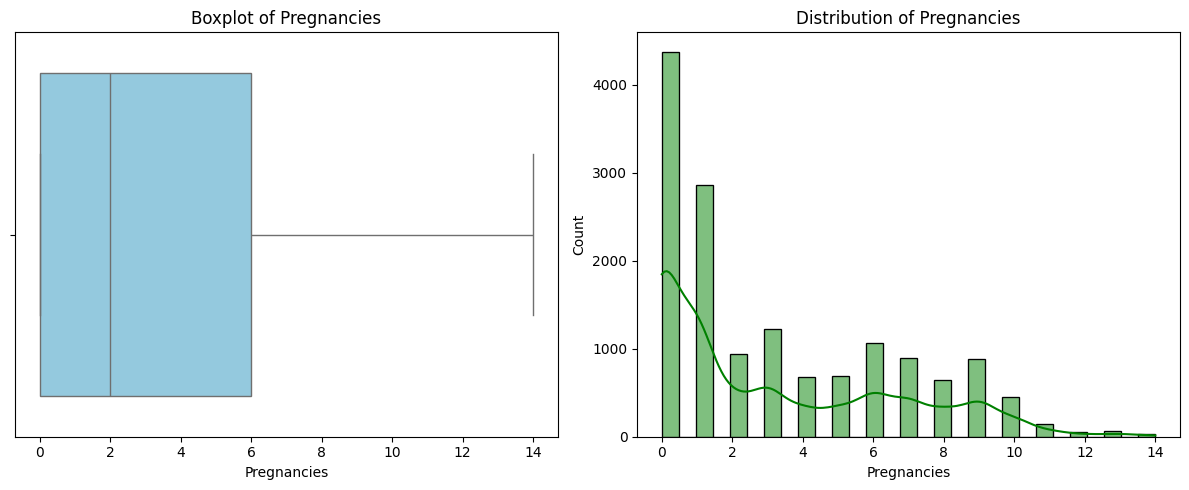

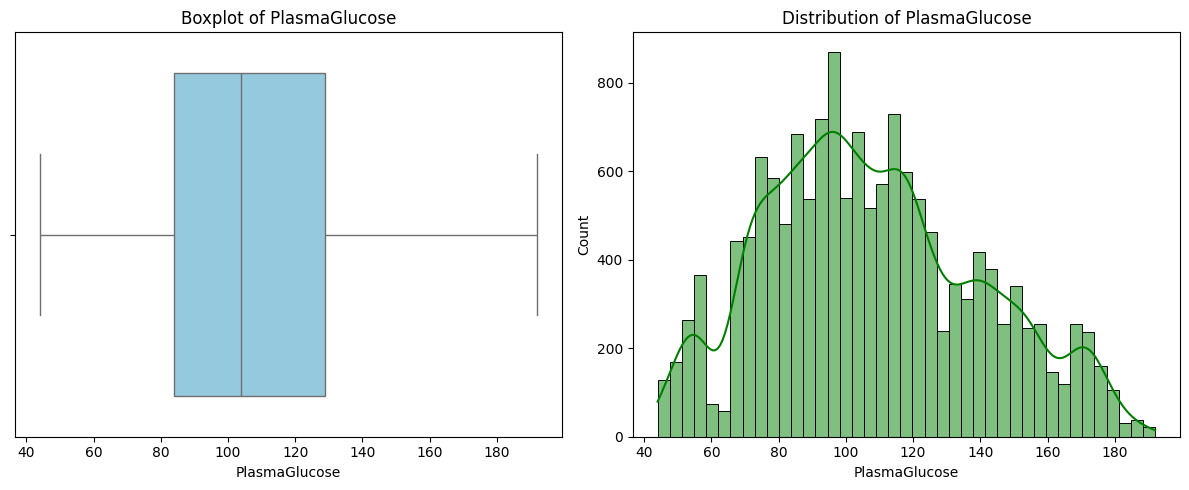

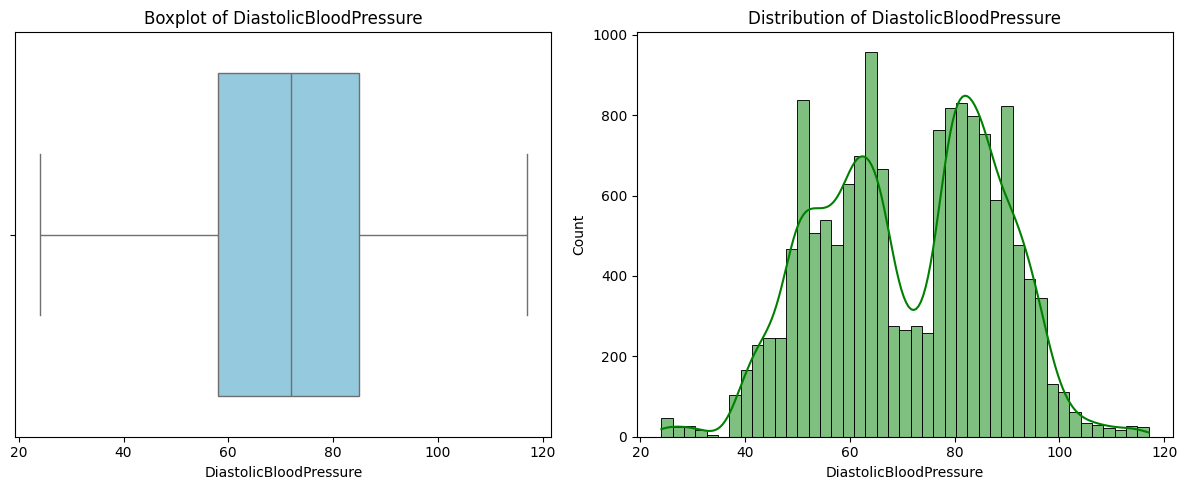

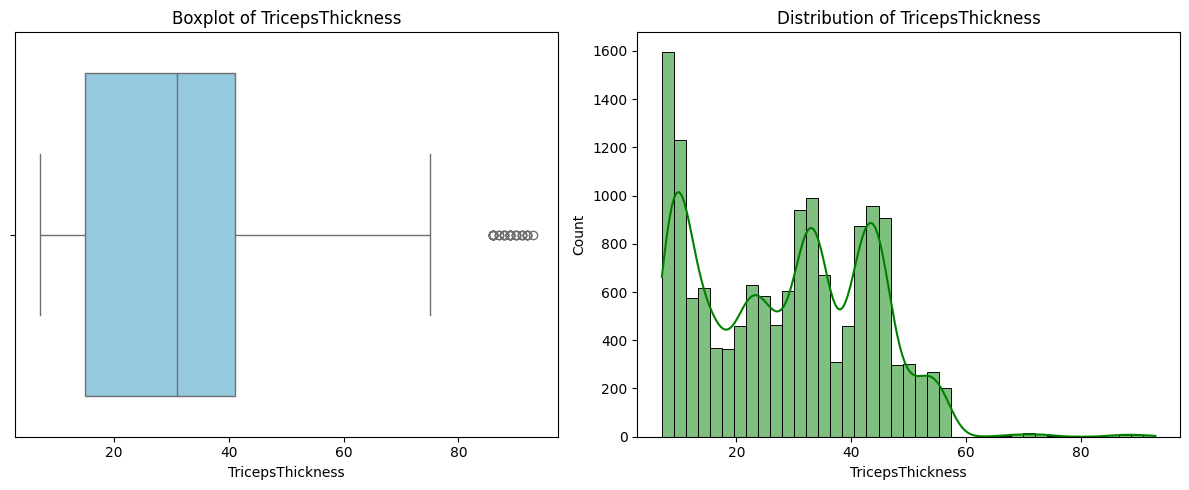

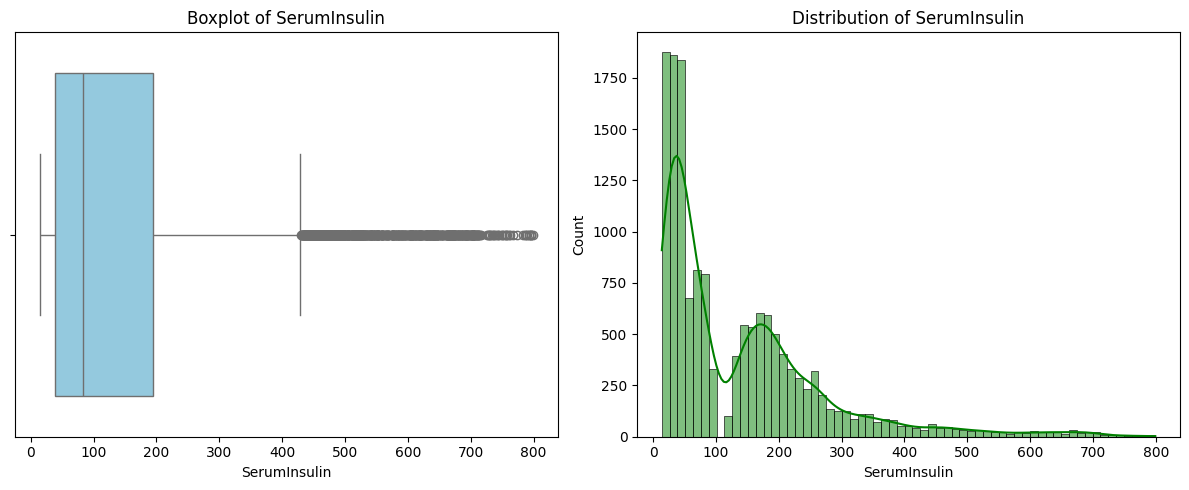

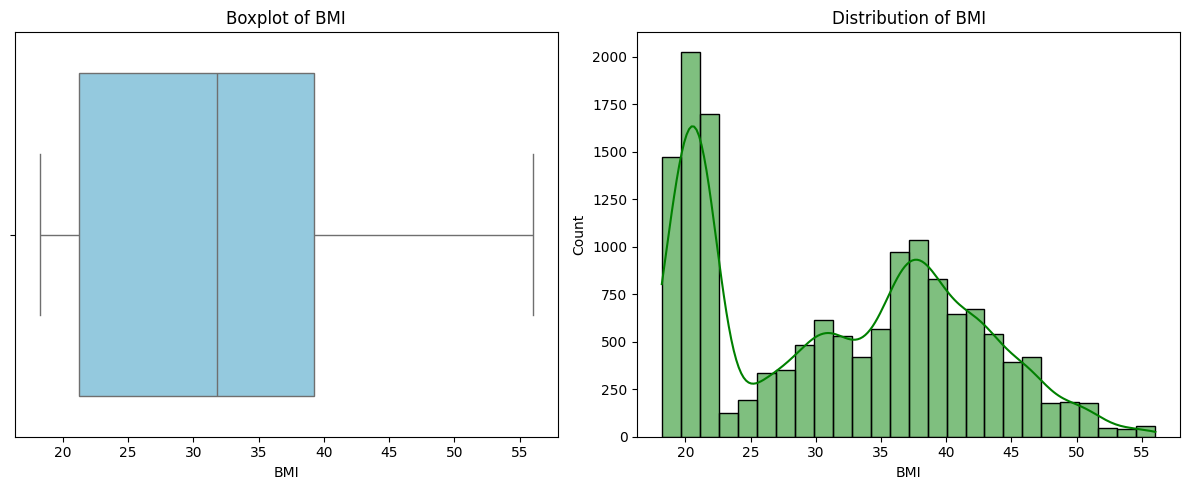

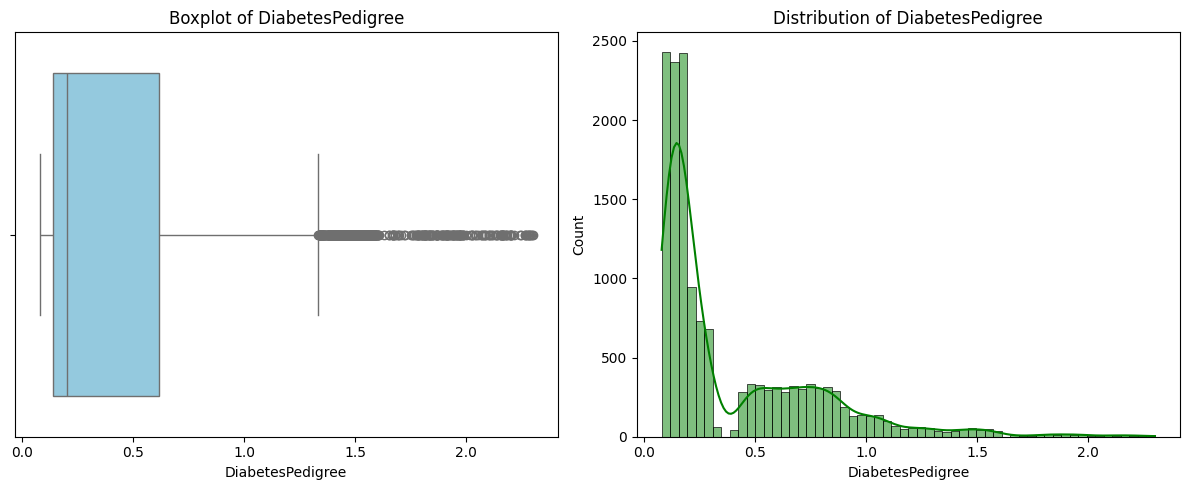

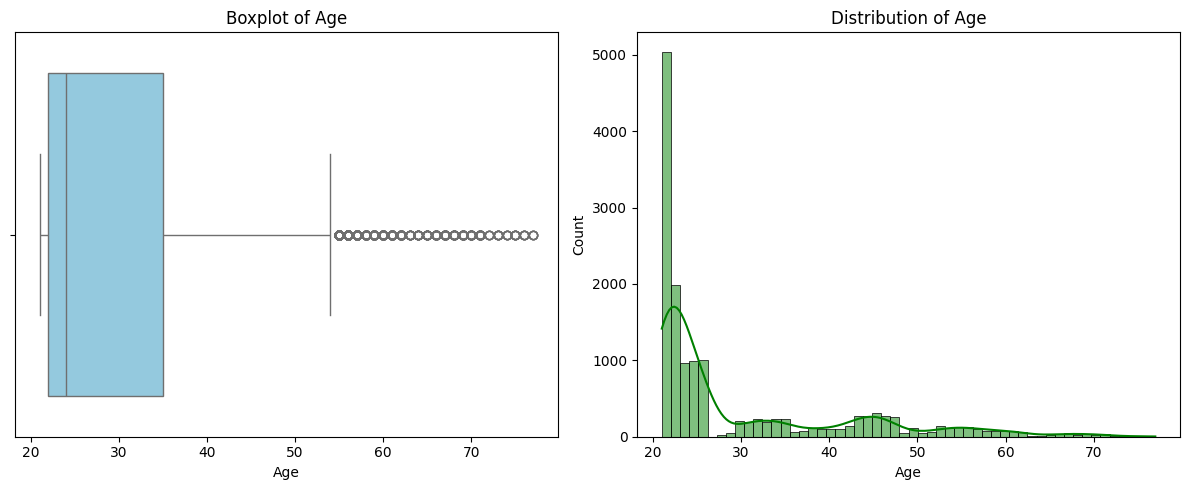


Summary statistics:
           PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               85.000000   
max    1.999997e+06     14.000000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      15000.000000  15000.000000  15000.000000      15000.000000   
mean          28.814000    137.852133     31.509646          0.398968   
std           14.555716    133.068252      9.759000          0.377944   
m

In [8]:
for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(x=data[feature], ax=axes[0], color='skyblue')
    axes[0].set_title(f"Boxplot of {feature}")
    
    sns.histplot(data[feature], kde=True, ax=axes[1], color='green')
    axes[1].set_title(f"Distribution of {feature}")
    
    plt.tight_layout()
    plt.show()

# Summary statistics
print("\nSummary statistics:\n", data.describe())

### Distribution of the target variable

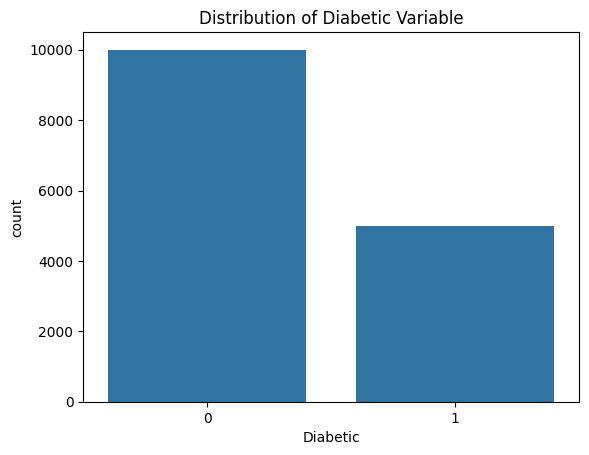

In [9]:
sns.countplot(x="Diabetic", data=data)
plt.title("Distribution of Diabetic Variable")
plt.show()

### Pairplot for feature relationships

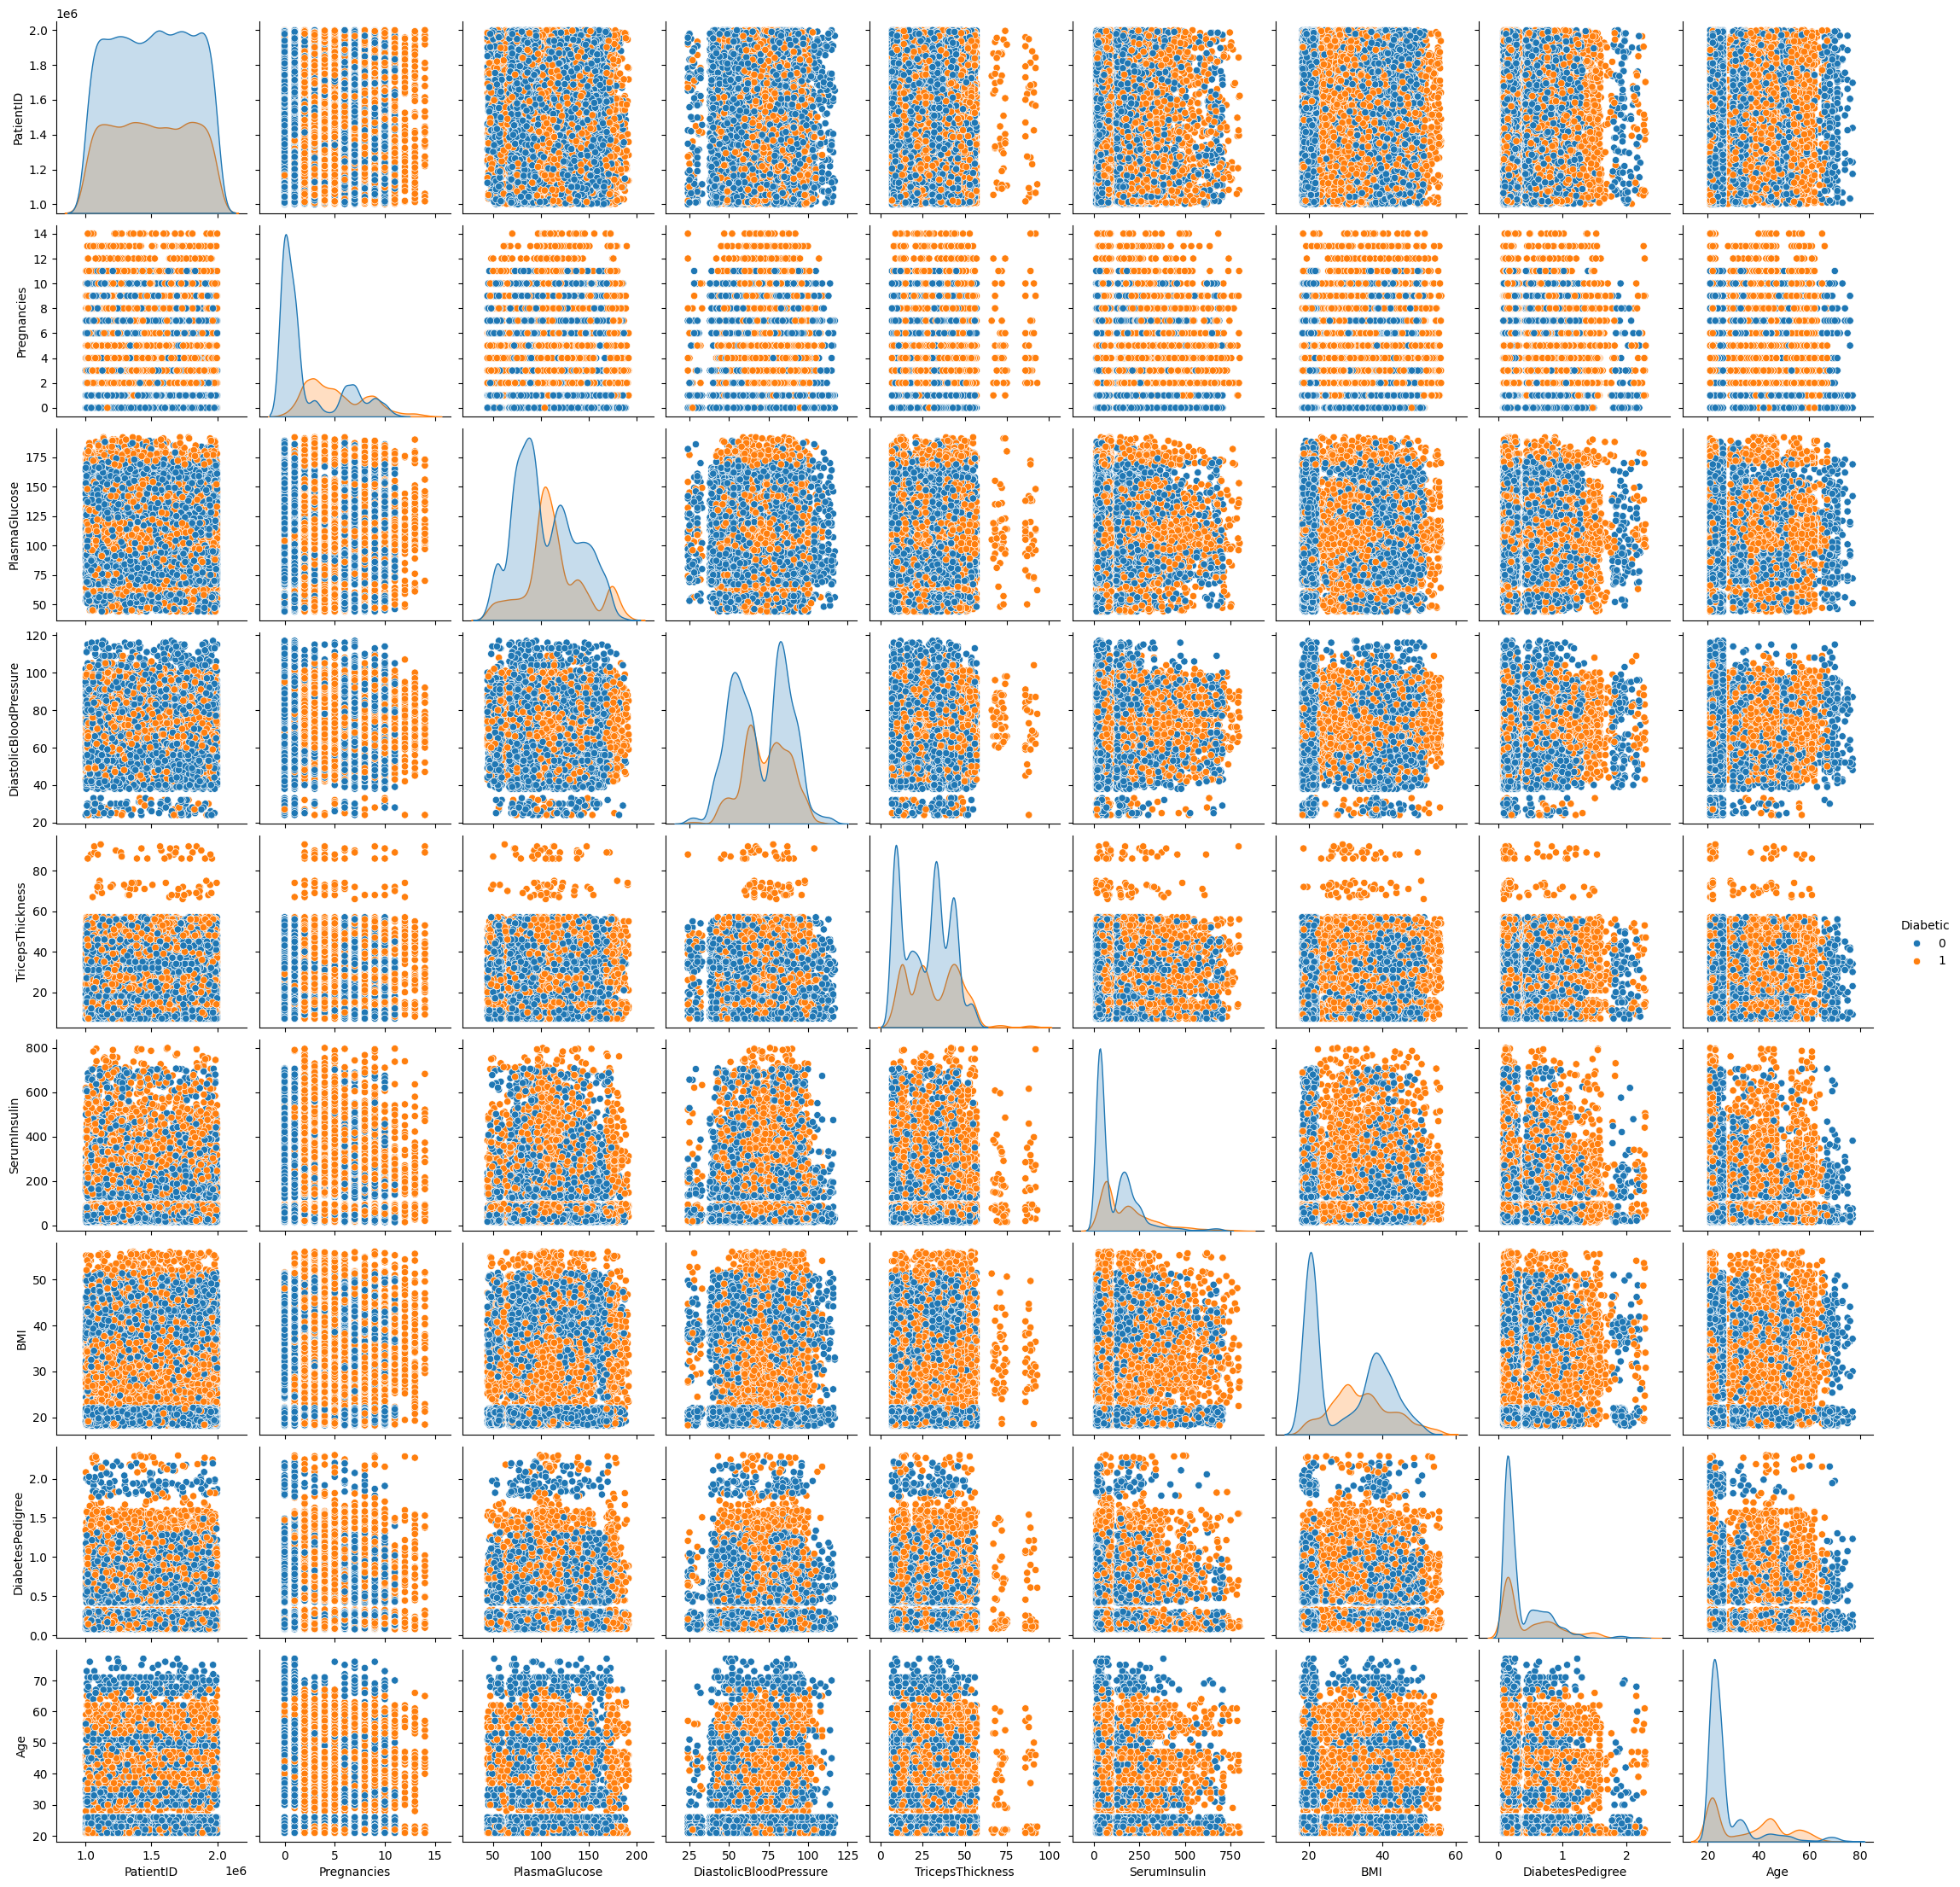

In [10]:
sns.pairplot(data, hue="Diabetic")
plt.show()

##                                     Part 3 : Data Transformation and Standardization

In [11]:
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data[numerical_features].mean())
print(data[numerical_features].std())
print("\nFirst 5 rows after standardization:\n", data[numerical_features].head())

Pregnancies              -1.752672e-17
PlasmaGlucose             1.601090e-16
DiastolicBloodPressure   -4.021672e-16
TricepsThickness         -6.158037e-18
SerumInsulin             -5.115908e-17
BMI                      -3.893774e-16
DiabetesPedigree         -8.715991e-17
Age                       1.136868e-17
dtype: float64
Pregnancies               1.000033
PlasmaGlucose             1.000033
DiastolicBloodPressure    1.000033
TricepsThickness          1.000033
SerumInsulin              1.000033
BMI                       1.000033
DiabetesPedigree          1.000033
Age                       1.000033
dtype: float64

First 5 rows after standardization:
    Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0    -0.950935       1.974401                0.523884          0.356298   
1     1.408315      -0.495823                1.299626          1.249448   
2     1.113409       0.223356               -1.445306          1.592967   
3     1.703222      -0.151868           

##                                  Part 4 : Correlation Analysis & Feature Selection

### Correlation matrix


Correlation Matrix:
                         PatientID  Pregnancies  PlasmaGlucose  \
PatientID                1.000000     0.006774      -0.001858   
Pregnancies              0.006774     1.000000       0.054502   
PlasmaGlucose           -0.001858     0.054502       1.000000   
DiastolicBloodPressure   0.008746     0.043528       0.007212   
TricepsThickness        -0.002406     0.063605       0.027100   
SerumInsulin            -0.020698     0.104487       0.033545   
BMI                     -0.003156     0.086386       0.020653   
DiabetesPedigree        -0.015413     0.054240       0.009057   
Age                     -0.007096     0.136972       0.038864   
Diabetic                -0.012494     0.407315       0.128004   

                        DiastolicBloodPressure  TricepsThickness  \
PatientID                             0.008746         -0.002406   
Pregnancies                           0.043528          0.063605   
PlasmaGlucose                         0.007212          0.

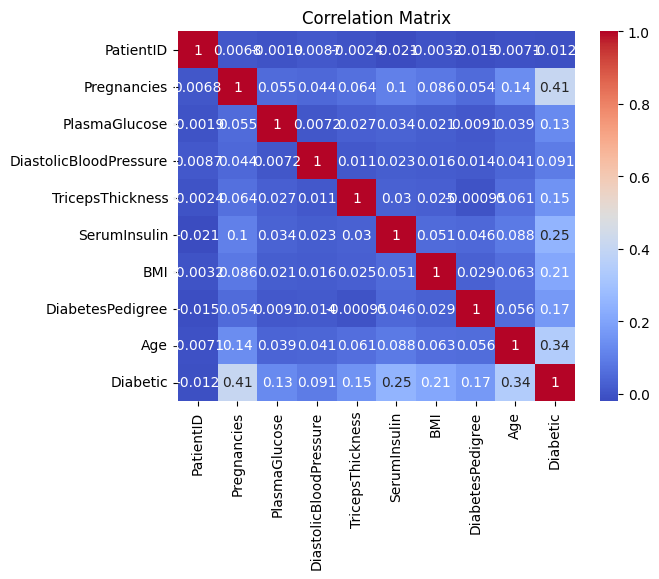

In [12]:
correlation_matrix = data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Identifying & selecting highly correlated features


Selected features based on correlation threshold:
 ['Pregnancies', 'Age']


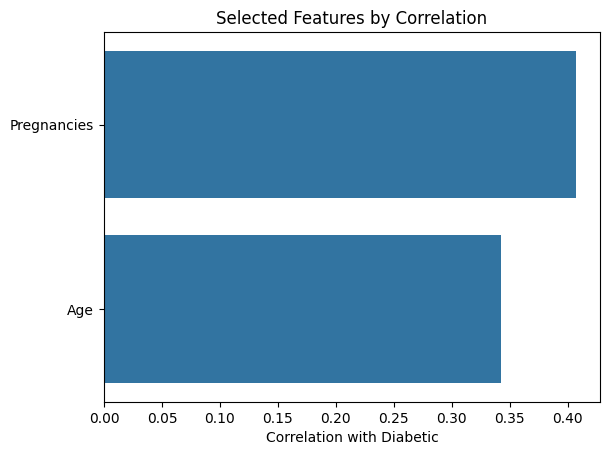

In [13]:
threshold = 0.3  # Ajustez le seuil ici
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Features strongly correlated with 'Diabetic'
high_corr = correlation_matrix.drop("Diabetic")[["Diabetic"]].abs().sort_values(by="Diabetic", ascending=False)
selected_features = high_corr[high_corr["Diabetic"] > threshold].index.tolist()
print("\nSelected features based on correlation threshold:\n", selected_features)

# Visualize selected features
if selected_features:
    sns.barplot(x=high_corr.loc[selected_features, "Diabetic"], y=selected_features, orient="h")
    plt.title("Selected Features by Correlation")
    plt.xlabel("Correlation with Diabetic")
    plt.show()
else:
    print("No features selected based on the correlation threshold.")

In [14]:
data.head(15)

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0     1354778    -0.950935       1.974401                0.523884   
1     1147438     1.408315      -0.495823                1.299626   
2     1640031     1.113409       0.223356               -1.445306   
3     1883350     1.703222      -0.151868                0.404539   
4     1424119    -0.656029      -0.714703               -0.729237   
5     1619297    -0.950935      -0.808509                1.239953   
6     1660149    -0.950935       0.786192               -1.445306   
7     1458769    -0.950935      -1.277539                0.941591   
8     1201647     1.408315      -0.871047                1.418971   
9     1403912    -0.656029      -1.121196               -2.400065   
10    1943830    -0.656029      -0.620898                0.881919   
11    1824483    -0.066216      -0.433286                1.478643   
12    1848869     0.523596       0.192088                1.777005   
13    1669231     1.113409       0.067013                0.643229   
14    1683688    -0.950935       1.255222               -0.788909   

    TricepsThickness  SerumInsulin       BMI  DiabetesPedigree       Age  \
0           0.356298     -0.863136  1.229683          2.154424 -0.755853   
1           1.249448     -0.765438 -1.052302         -0.636632 -0.590417   
2           1.592967     -0.772953  1.024922         -0.846581 -0.590417   
3          -0.262036      1.248633 -0.197512          2.338793  1.063938   
4          -0.124629     -0.772953  1.136926          0.398417 -0.673135   
5          -1.361298      0.865358 -1.207693         -0.782003 -0.342264   
6          -0.674259      0.669963 -0.980491         -0.594839 -0.755853   
7           0.974632     -0.765438 -1.355914         -0.430774 -0.342264   
8           0.287594     -0.855621 -0.500551          0.119015  1.891116   
9           0.768521     -0.720347  0.551297         -0.780630 -0.342264   
10         -1.223890     -0.600104  1.200511         -0.446333 -0.673135   
11          0.150187     -0.765438 -1.046778         -0.370299 -0.590417   
12          0.974632     -0.509922  0.510897         -0.846127  0.650349   
13         -0.880371     -0.705317  0.469290         -0.311410 -0.424982   
14         -1.223890      0.309234  0.787241         -0.630112  1.229374   

    Diabetic  
0          0  
1          0  
2          0  
3          1  
4          0  
5          0  
6          0  
7          0  
8          1  
9          0  
10         0  
11         0  
12         1  
13         0  
14         0

In [15]:
print(f"Total features before selection: {len(correlation_matrix.columns)-1}")
print(f"Selected features: {selected_features}")

Total features before selection: 9
Selected features: ['Pregnancies', 'Age']


##                                Part 5 : Model Selection, Comparison & Evaluation

In [16]:
!pip install XGBoost


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier
import xgboost as xgb

### Features & Target

In [18]:
X = data[['Pregnancies', 'Age']] 
y = data['Diabetic']    

### Train & Test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### List of models to test

In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

### Train & Evaluate each model

In [21]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.2f}")

Logistic Regression: Accuracy = 0.73
Decision Tree: Accuracy = 0.89
Random Forest: Accuracy = 0.89
Gradient Boosting: Accuracy = 0.89
XGBoost: Accuracy = 0.89
SVM: Accuracy = 0.86
KNN: Accuracy = 0.88
Naive Bayes: Accuracy = 0.73
MLP: Accuracy = 0.86
AdaBoost: Accuracy = 0.89


### Visualize the results

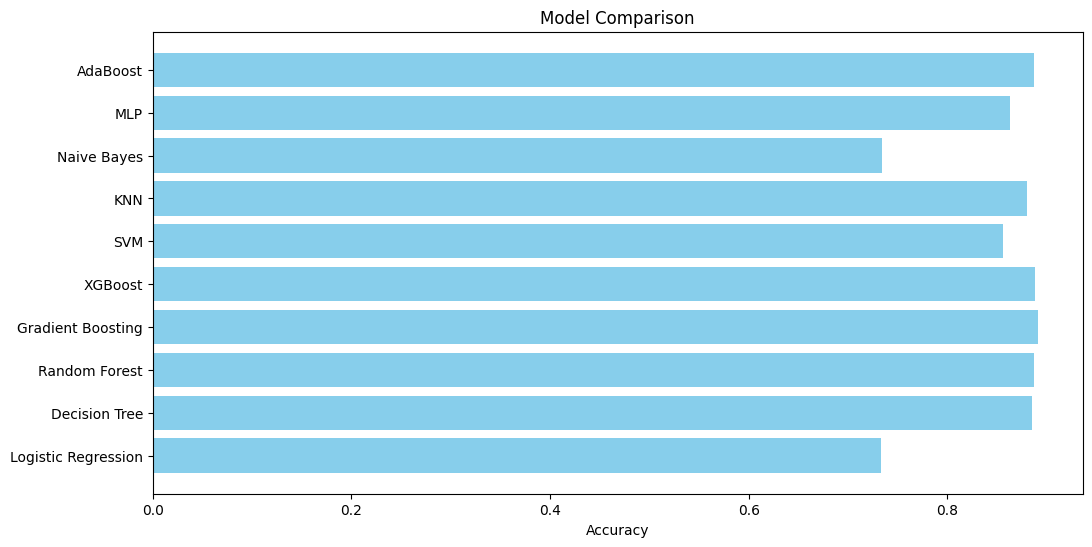

In [22]:
plt.figure(figsize=(12, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.show()

##                                                   Part 6 : Models Optimisation

### Fonction for evaluating models

In [23]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

### Optimisation of hyperparameters for each model

### 1. Gradient Boosting

In [25]:
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5, scoring='accuracy')
gb_grid.fit(X_train, y_train)
print("Best Gradient Boosting Params:", gb_grid.best_params_)
print("Gradient Boosting Metrics:")
evaluate_model(gb_grid.best_estimator_, X_test, y_test)

Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Gradient Boosting Metrics:
Accuracy: 0.8915555555555555
Precision: 0.8310322156476002
Recall: 0.8454849498327759
F1-Score: 0.8381962864721485

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      3005
           1       0.83      0.85      0.84      1495

    accuracy                           0.89      4500
   macro avg       0.88      0.88      0.88      4500
weighted avg       0.89      0.89      0.89      4500



### 2. AdaBoost

In [27]:
adb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 1],
}
adb_grid = GridSearchCV(AdaBoostClassifier(), adb_params, cv=5, scoring='accuracy')
adb_grid.fit(X_train, y_train)
print("Best AdaBoost Params:", adb_grid.best_params_)
print("AdaBoost Metrics:")
evaluate_model(adb_grid.best_estimator_, X_test, y_test)

Best AdaBoost Params: {'learning_rate': 1, 'n_estimators': 200}
AdaBoost Metrics:
Accuracy: 0.8926666666666667
Precision: 0.836436170212766
Recall: 0.8414715719063545
F1-Score: 0.8389463154384794

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      3005
           1       0.84      0.84      0.84      1495

    accuracy                           0.89      4500
   macro avg       0.88      0.88      0.88      4500
weighted avg       0.89      0.89      0.89      4500



### Comparison of optimized models

/tmp/ipykernel_448/557287871.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


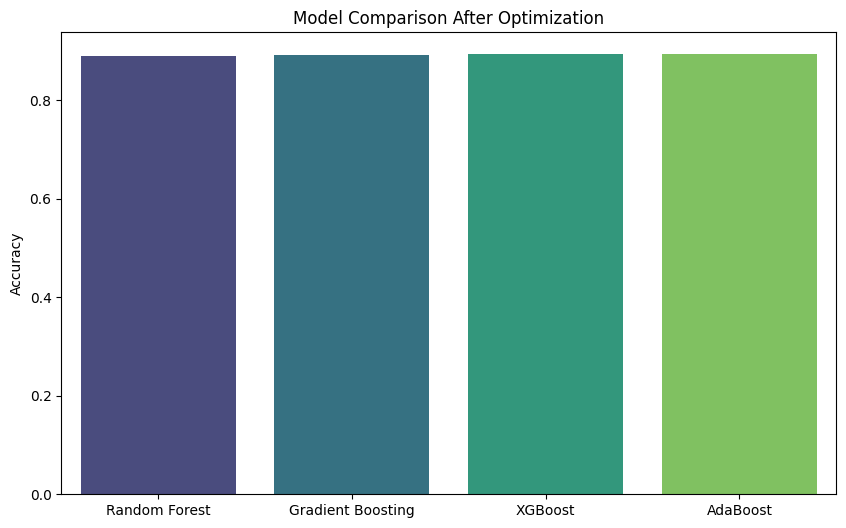

In [32]:
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'AdaBoost']
accuracies = [accuracy_score(y_test, rf_grid.best_estimator_.predict(X_test)),
              accuracy_score(y_test, gb_grid.best_estimator_.predict(X_test)),
              accuracy_score(y_test, xgb_grid.best_estimator_.predict(X_test)),
              accuracy_score(y_test, adb_grid.best_estimator_.predict(X_test))]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Comparison After Optimization")
plt.ylabel("Accuracy")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cccdc730-e07c-4449-8635-e48bc2c3f083' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>